In [69]:
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
from networkx.algorithms import bipartite


In [88]:
df = pd.read_csv("morbidmap.txt",sep='\t')
df.head()
G = nx.Graph()

c = 0
colors = ['#d61111','#11c6d6']
list_of_colors = []
disease_list = []
for index, row in df.iterrows():
    if isinstance(row['Gene Symbols'], str):
        
        G.add_node(row['# Phenotype'], attr_dict={'type':'gene'})
        disease_list.append(row['# Phenotype'])
        list_of_colors.append(colors[0])
        
        list_ = row['Gene Symbols'].split(", ")
        
        for i in list_:
            if not G.has_node(i):
                G.add_node(i,attr_dict={'type':'gene'})
                list_of_colors.append(colors[1])
            G.add_edge(row['# Phenotype'], i)
    if c >1000:
        break
    else:
        c = c+1
        
n = G.number_of_nodes()#function for number of nodes
m = G.size() #function for number of edges
kmean = 2*m/n #mean of degree is 2*edges/number of nodes
C = nx.transitivity(G)# C 

print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree   , <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)

print(n, len(list_of_colors))

number of nodes, n  = 3914
number of edges, m  = 3270
mean degree   , <k> =  1.67
clustering coefficient, C     =  0.00
3914 3923


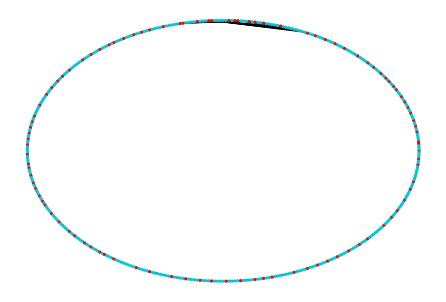

In [85]:
nx.draw_circular(G,node_color = list_of_colors, with_labels=False, node_size = 5) # draw it pretty
plt.show()

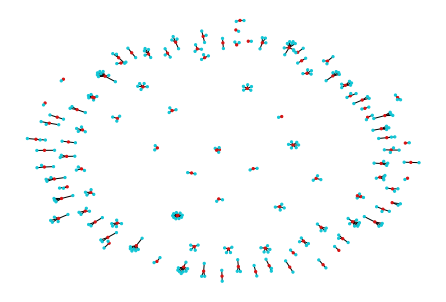

In [86]:
nx.draw_spring(G,node_color = list_of_colors, with_labels=False, node_size = 5) # draw it pretty
plt.show()

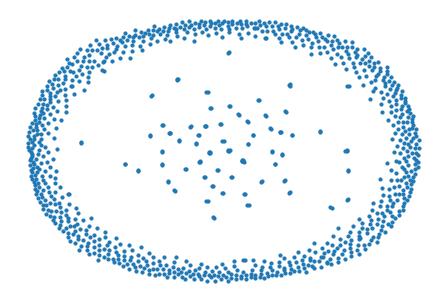

In [90]:
G_diseases = bipartite.projected_graph(G, disease_list, multigraph=True)
nx.draw_spring(G_diseases, with_labels=False, node_size = 10) # draw it pretty